# Model Evaluation and Refinement
- Model Evaluation
- Over-fitting, Under-fitting and Model Selection
- Ridge Regression
- Grid Search

In [5]:
import pandas as pd
import numpy as np

from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

In [3]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [6]:
# Functions for plotting
def distribution_plot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()
    
    
def polly_plot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## 1 - Training and Testing

In [8]:
y_data = df['price']

# drop price data in x data
x_data = df.drop('price',axis=1)

# Randomly split our data into training and testing data
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 170


In [9]:
# 40% of data for testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [11]:
from sklearn.linear_model import LinearRegression

lre = LinearRegression()

# fit the model using the feature horsepower
lre.fit(x_train[['horsepower']], y_train)

# Calculate the R^2 on the test data
lre.score(x_test[['horsepower']], y_test)

0.707688374146705

In [12]:
# R^2 is much smaller using the training data
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

In [15]:
# R^2 on the test data using 90% of the data for training data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7340722810055448

**Cross-validation Score**


In [17]:
from sklearn.model_selection import cross_val_score

#  input the object, the feature in this case ' horsepower', the target data (y_data).
# The parameter 'cv' determines the number of folds
r_cross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [18]:
r_cross
# The default scoring is R^2; each element in the array has the average R^2 value in the fold

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [19]:
# calculate the average and standard deviation of our estimate
print("The mean of the folds are", r_cross.mean(), 
      "and the standard deviation is", r_cross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [21]:
# use negative squared error as a score
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [24]:
# Calculate the average R^2 using two folds, 
# find the average R^2 for the second fold utilizing the horsepower as a feature
r_cross1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)

r_cross1.mean()

0.5166761697127429

In [26]:
# use the function 'cross_val_predict' to predict the output
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lre, x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## 2 - Overfitting, Underfitting and Model Selection

In [27]:
# create Multiple linear regression objects and train the model using 'horsepower',
# 'curb-weight', 'engine-size' and 'highway-mpg' as features
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# prediction
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [29]:
# Prediction using test data:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

In [30]:
# perform some model evaluation using our training and testing data separately
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

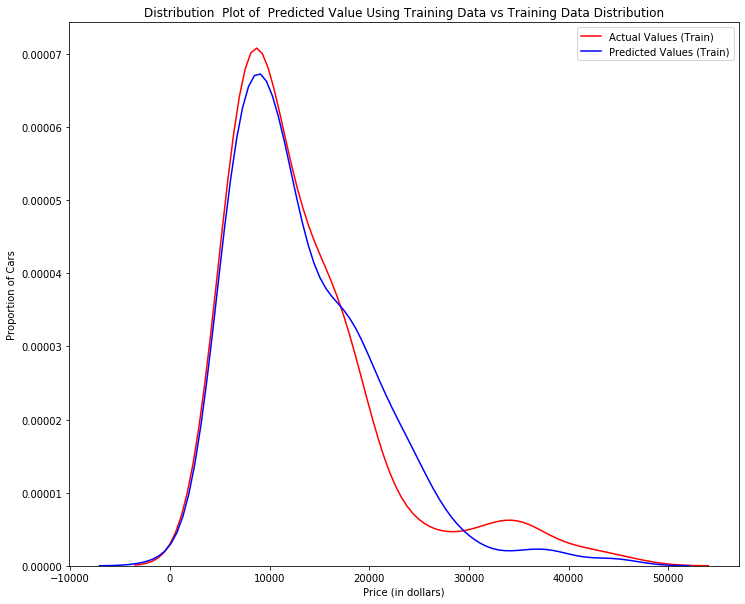

In [31]:
title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
distribution_plot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", title)

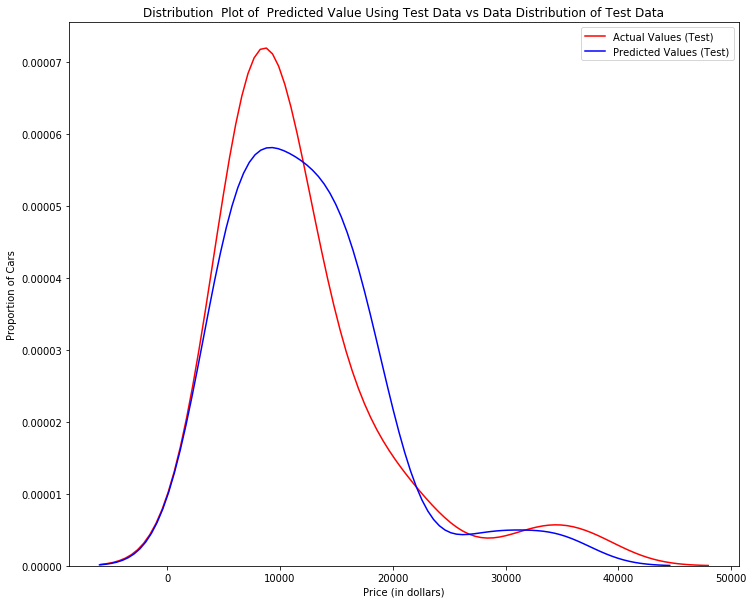

In [32]:
# So far the model seems to be doing well in learning from the training dataset.
# But what happens when the model encounters new data from the testing dataset?
title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
distribution_plot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",title)

**Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.**

In [34]:
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [36]:
# perform a degree 5 polynomial transformation on the feature 'horse power'.
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [37]:
# create a linear regression model "poly" and train it.
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# see the output of our model
yhat = poly.predict(x_test_pr)

print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


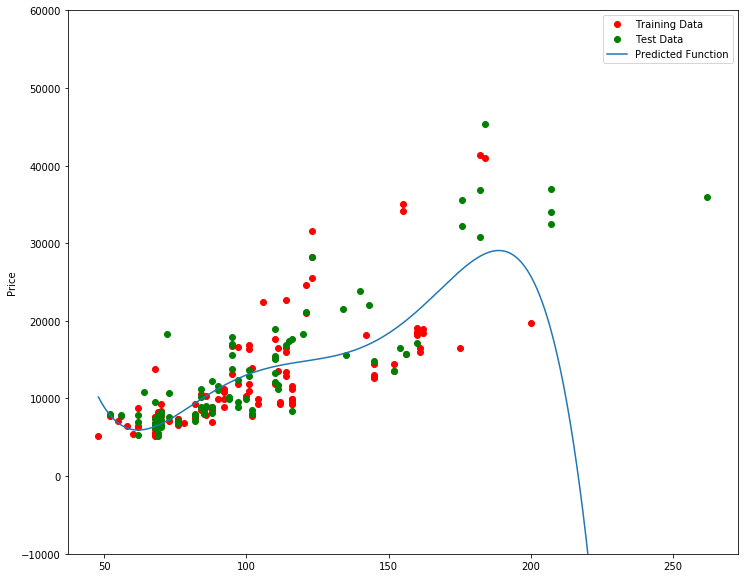

In [39]:
polly_plot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

# We see that the estimated function appears to track the data
# but around 200 horsepower, the function begins to diverge from the data points.

In [40]:
# R^2 of the training data:
poly.score(x_train_pr, y_train)

0.556771690212023

In [42]:
# R^2 of the test data:
poly.score(x_test_pr, y_test)

# The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

-29.871340302044153

Text(3, 0.75, 'Maximum R^2 ')

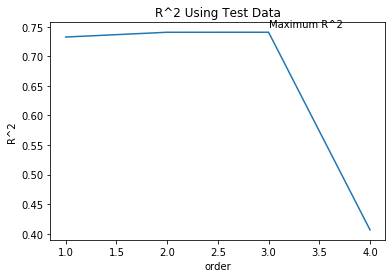

In [43]:
# see how the R^2 changes on the test data for different order polynomials and plot the results: 
rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then the R^2 dramatically decreases at four.

In [46]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    polly_plot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

The following interface allows you to experiment with different polynomial orders and different amounts of data.

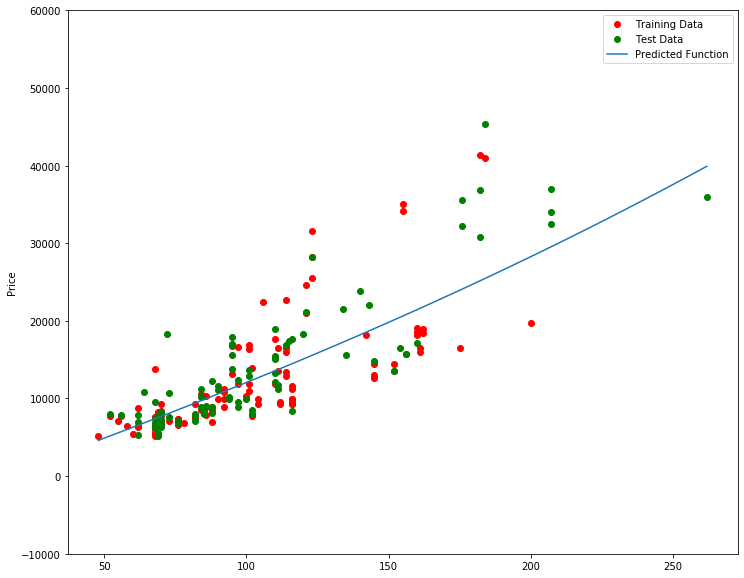

<function __main__.f(order, test_data)>

In [47]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

In [58]:
# Create a "PolynomialFeatures" object "pr1" of degree two
pr1 = PolynomialFeatures(degree=2)

# Transform the training and testing samples for the features 'horsepower', 
# 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform"
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [59]:
x_train_pr1.shape

(110, 15)

In [60]:
# Create a linear regression model "poly1" and train the 
# object using the method "fit" using the polynomial features
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

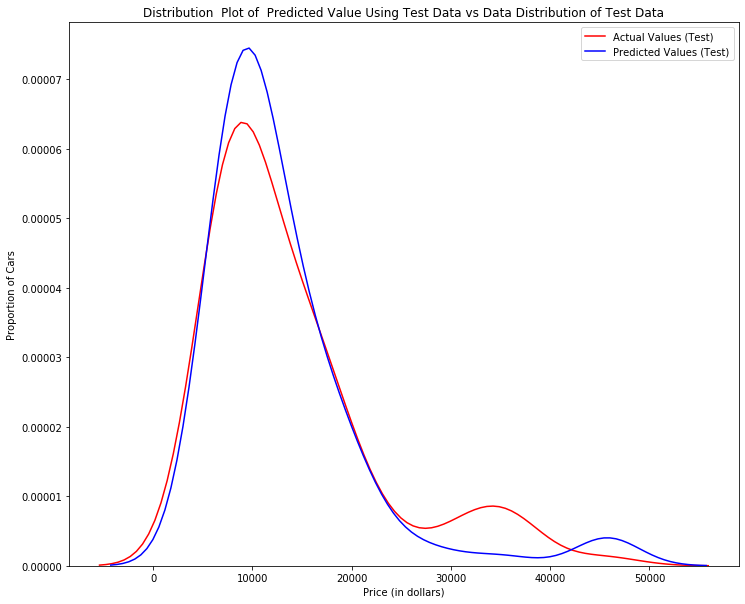

In [65]:
# predict an output on the polynomial features
yhat_test1 = poly1.predict(x_test_pr1)

title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
distribution_plot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", title)

The predicted value is lower than actual value for cars where the price  $ 10,000 range, conversely the predicted price is larger than the price cost in the $30, 000 to $40,000 range. As such the model is not as accurate in these ranges .